# Regresión Logpistica

Refresquemos antes de seguir. El **Machine Learning** se aplica de *tres maneras* diferentes:
- El Aprendizaje Supervisado
- El Aprendizaje no Supervisado
- El Aprendizaje por Reforzamiento

El **Aprendizaje Supervisado** (que es un modelo que puede hacer predicciones sobre nuevos datos en base a lo aprendido en el entrenamiento con datos etiquetados), se puede aplicar usando *4 algoritmos* distintos:
* Regresión Lineal
* Regresión Logística
* Árboles de Decisión
* Bosques Aleatorios

En la lección anterior hemos aprendido a hacer **Regresión Lineal**, por lo que en esta lección nos toca ver el segundo algoritmo: la **Regresión Logística**.

La **Regresión Logística** es una herramienta que, basándose en información que le damos, aprende a **distinguir entre dos opciones posibles**, como un *sí* o un *no*. La **Regresión Logística** no se usa para predecir *valores* o *categorías*, sino solamente para predecir qué tan probable que algo sea un sí o un no.

Para verlo en la práctica vamos a imaginar un ejemplo. Tenemos una base de datos de clientes que han comprado (o no) un seguro en nuestra compañía, por lo que queremos aprender a predecir, en base a esos datos, si un nuevo cliente va a comprar (o no) nuestro seguro.

Nuestro algoritmo va a revisar las características de esos clientes para predecir, según las características de los nuevos clientes, si es probable que compren (o no).

Comencemos importando las librerías que vamos a necesitar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Ahora vamos a importar un **archivo csv** con la información de nuestros clientes. Lo vas a encontrar en la **carpeta de descargas**:

In [2]:
ruta = "D:\\Cursos\\ds-ml-18dias\\11-dia 11\\08.1 datos_seguro.csv"

df = pd.read_csv(ruta)
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Y ahora pongamos esta información en **matplotlib** para verlo gráficamente.

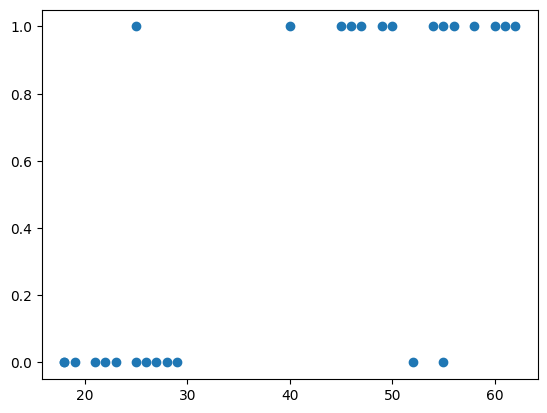

In [3]:
plt.scatter(df.edad,
           df.compra);

Por lo que podemos observar, las personas menores de 40 años, raramente han comprado seguros, por lo tanto parece ser que la edad es un factor importante a la hora de predecir el comportamiento de compra de nuestros clientes. Esto es fácil de ver porque nuestra base de datos es extremadamente simple, pero vamos a poner esto en un modelo de regresión logística para poder medir esto con mucha mayor precisión.

El primer paso va a ser separar la información en conjuntos de datos para **entrenamiento**, y conjunto de datos para **prueba**. Para eso voy a crear cuatro variables:

	• X_entrena
	• X_prueba
	• y_entrena
	• y_prueba

Necesito poner en cada una de esas variables algunos de los registros de mi dataset, pero necesito asegurarme de que cada registro aparezca en una de esas variables (la de entrenamiento o la de prueba) sin repetirse, y sin dejar ningún registro afuera.

¿Cómo hago eso de un modo sencillo? Con la función `train_test_split()` de `sklearn.model_selection` que para eso la hemos importado al comienzo de este cuaderno.

In [4]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(df[["edad"]], df["compra"], train_size=0.9)

Esta celda no nos devuelve nada, pero ya ha hecho su trabajo que es distribuir todos nuestros datos entre estas 4 variables.

Y para que veas que lo ha hecho muy bien, veamos qué es lo que tiene `X_entrena` y `X_prueba`:

In [5]:
X_entrena

,edad
5,56
21,26
11,28
0,22
2,47
16,25
9,61
15,55
24,50
14,49


In [6]:
X_prueba

,edad
7,60
3,52
26,23


Como puedes ver, la función `train_test_split()` ha mezclado los registros y los ha dividido en dos grupos, y la razón por la que ha puesto tantos en el grupo de entrenamiento, y tan poco en el grupo de prueba, es porque yo lo he especificado así en el parámetro `train_size`, donde le he pedido que incluya el **90%** de los datos (*0.9*) en el **grupo de entrenamiento**, y por eso solo ha quedado el **10%** para el **grupo de prueba**. Si no colocamos nada en este parámetro, la función `train_test_split()` por defecto va a usar el 80% para entrenamiento y el 20% para prueba.

Recuerda que los grupos de entrenamiento y de prueba son mutuamente **excluyentes** (por lo que no se repiten los registros entre sí) y además son **exhaustivos** (porque entre ambos incluyen al 100% de los datos originales).

Si te estás preguntando para qué hacemos esto, es porque de esta manera podemos comprobar el funcionamiento de nuestro modelo en base a los datos que tenemos. Vamos a entrenar al modelo con una gran parte de nuestros datos, y luego lo vamos a poner a prueba sus predicciones con la otra parte más pequeña, y de esa manera podremos medir la cantidad de aciertos o errores que ha conseguido, y así estimar qué tan bien se va a desempeñar nuestro modelo cuando ingrese información nueva.

Muy bien, vayamos al siguiente paso, que es crear el objeto que contenga al modelo de regresión logística que hemos importado:

In [7]:
modelo = LogisticRegression()

Y ahora lo vamos a entrenar con las variables de entrenamiento que hemos creado antes:

In [8]:
modelo.fit(X_entrena, y_entrena)

LogisticRegression()

Nuestro modelo ya está entrenado (ojalá yo pudiera entrenar así de rápido), y ahora vamos a usar un mpetodo llamado `score`, que se usa para evaluar el desempeño de los modelos de Machine Learning. 

In [9]:
modelo.score(X_entrena, y_entrena)

0.9166666666666666

Bueno, hemos obtenido un puntaje de 87.5%.

En general, el objetivo de entrenar un modelo de aprendizaje automático es obtener el mejor rendimiento posible en datos nuevos y en datos no vistos.

El método de puntuación proporcionado por **scikit-learn** es una forma de medir el rendimiento del modelo entrenado en un conjunto de prueba.

Para definir si un puntaje es bueno o malo, va a depender del algoritmo específico y del problema que se esté resolviendo, pero típicamente, un puntaje más alto es mejor que uno más bajo. Normalmente un puntaje de *0.8* podría considerarse bueno en la mayoría de los casos, pero según el caso podría considerarse un puntaje pobre.

La cuestión es que mi modelo es confiable, y me puedo apoyar en el para estimar cómo se comportarán los nuevos clientes.

Entonces lo pongamos en práctica, trayendo nuevos datos, y haciendo predicciones sobre las probabilidades de que me compren o no un seguro.

In [10]:
datos_nuevos = pd.DataFrame({"edad":[25, 35, 45, 55]})
datos_nuevos

,edad
0,25
1,35
2,45
3,55


Sobre estos datos voy a aplicar mi `modelo` usando la función `predict_proba()`.

In [11]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

array([[0.86023921, 0.13976079],
       [0.55687847, 0.44312153],
       [0.20419606, 0.79580394],
       [0.04978155, 0.95021845]])

Como puedes ver, `predict_proba()` nos devuelve **4 tuplas** (una para cada registro) con las probabilidades de que no compre y las probabilidades de que sí compre. Nos vamos a centrar en el segundo número de cada tupla (las probabilidades de compra).

In [12]:
prob_compra = probabilidades[:, 1]
prob_compra

array([0.13976079, 0.44312153, 0.79580394, 0.95021845])

Y ahora procuremos graficar esta nueva información junto al **scatter** que hicimos al comienzo de esta lección:

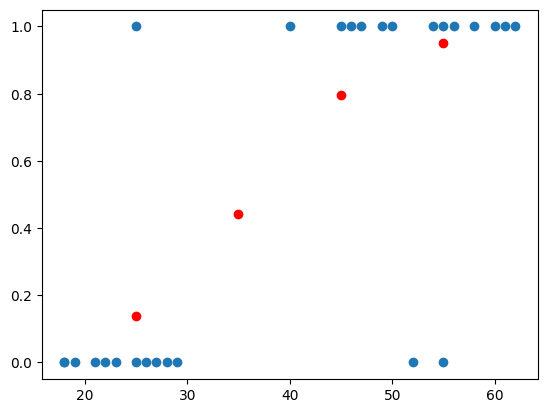

In [13]:
plt.scatter(df.edad,
           df.compra)
plt.scatter(datos_nuevos["edad"],
           prob_compra,
           color="red");

Esto ha sido **Regresión Logística**, y es turno de pasar al tercer algoritmo de aprendizaje supervisado en Machine Learning, que son los **Árboles de Decisión**.